In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import itertools
from datetime import datetime

from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [3]:
data = pd.read_csv('vk-neuron-answers.tsv', sep = '\t').iloc[:,[0,1,4]]
data.dropna(inplace = True)

names = {
    '7df5957a2146d6db10b37eadc652b40b': 'pasha',
    '9a911dbc66c75af715117f135c1f5052': 'dima',
    'ad1c74b7de1fe4aefb70a35e56de4b05': 'sasha'
}
data['ASSIGNMENT:worker_id'] = data['ASSIGNMENT:worker_id'].map(lambda x: names[x])

In [4]:
data.head()

,INPUT:text,OUTPUT:result,ASSIGNMENT:worker_id
0,"Доверие и взаимопонимание, помошь",0.0,sasha
1,Полина пожалуйста не уходи из группы🙏🙏🙏🙏,1.0,sasha
2,"Прохор, я нет, а вот Артур и ты да)",0.0,sasha
3,"Оля ❤Джолли ?!! Или мне одному показалось , чт...",1.0,sasha
4,ну ты ОВОЩЬ! ),-1.0,sasha


In [5]:
pd.DataFrame(data.stack(), columns = ['value']).head(10)

value
0 INPUT:text                            Доверие и взаимопонимание, помошь
  OUTPUT:result                                                         0
  ASSIGNMENT:worker_id                                              sasha
1 INPUT:text                     Полина пожалуйста не уходи из группы🙏🙏🙏🙏
  OUTPUT:result                                                         1
  ASSIGNMENT:worker_id                                              sasha
2 INPUT:text                          Прохор, я нет, а вот Артур и ты да)
  OUTPUT:result                                                         0
  ASSIGNMENT:worker_id                                              sasha
3 INPUT:text            Оля ❤Джолли ?!! Или мне одному показалось , чт...

In [6]:
d = pd.crosstab(data['ASSIGNMENT:worker_id'], data['OUTPUT:result'])
d

OUTPUT:result,-2.0,-1.0,0.0,1.0,2.0,3.0
ASSIGNMENT:worker_id,,,,,,
dima,27,28,100,44,64,37
pasha,25,31,113,43,47,41
sasha,18,26,130,63,34,29


In [7]:
d.reset_index().melt().head(10)

,OUTPUT:result,value
0,ASSIGNMENT:worker_id,dima
1,ASSIGNMENT:worker_id,pasha
2,ASSIGNMENT:worker_id,sasha
3,-2,27
4,-2,25
5,-2,18
6,-1,28
7,-1,31
8,-1,26
9,0,100


In [8]:
pd.DataFrame(d.stack()).rename(columns = {0:'value'}).head(10)

value
ASSIGNMENT:worker_id OUTPUT:result       
dima                 -2.0              27
                     -1.0              28
                      0.0             100
                      1.0              44
                      2.0              64
                      3.0              37
pasha                -2.0              25
                     -1.0              31
                      0.0             113
                      1.0              43

In [9]:
data.melt().head()

,variable,value
0,INPUT:text,"Доверие и взаимопонимание, помошь"
1,INPUT:text,Полина пожалуйста не уходи из группы🙏🙏🙏🙏
2,INPUT:text,"Прохор, я нет, а вот Артур и ты да)"
3,INPUT:text,"Оля ❤Джолли ?!! Или мне одному показалось , чт..."
4,INPUT:text,ну ты ОВОЩЬ! )


In [10]:
pd.melt(data).tail()

,variable,value
2695,ASSIGNMENT:worker_id,dima
2696,ASSIGNMENT:worker_id,dima
2697,ASSIGNMENT:worker_id,dima
2698,ASSIGNMENT:worker_id,dima
2699,ASSIGNMENT:worker_id,dima


In [11]:
data.head()

,INPUT:text,OUTPUT:result,ASSIGNMENT:worker_id
0,"Доверие и взаимопонимание, помошь",0.0,sasha
1,Полина пожалуйста не уходи из группы🙏🙏🙏🙏,1.0,sasha
2,"Прохор, я нет, а вот Артур и ты да)",0.0,sasha
3,"Оля ❤Джолли ?!! Или мне одному показалось , чт...",1.0,sasha
4,ну ты ОВОЩЬ! ),-1.0,sasha


In [12]:
stacked = pd.DataFrame(d.stack()).reset_index().rename(columns = {0:'value'})
stacked.head(10)

,ASSIGNMENT:worker_id,OUTPUT:result,value
0,dima,-2.0,27
1,dima,-1.0,28
2,dima,0.0,100
3,dima,1.0,44
4,dima,2.0,64
5,dima,3.0,37
6,pasha,-2.0,25
7,pasha,-1.0,31
8,pasha,0.0,113
9,pasha,1.0,43


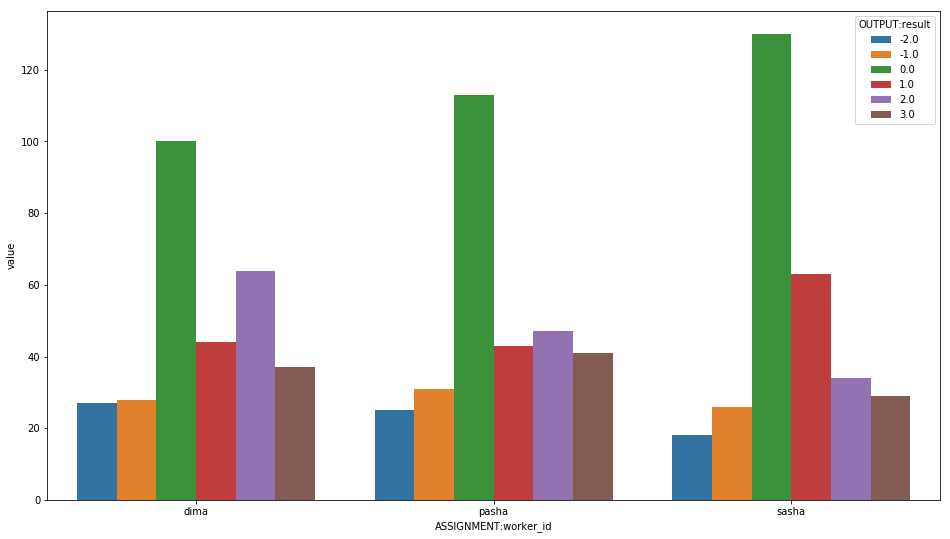

In [20]:
#sns.countplot(x='ASSIGNMENT:worker_id', hue = 'OUTPUT:result', data = data)
sns.barplot(x='ASSIGNMENT:worker_id', y='value', hue='OUTPUT:result', data = stacked)

In [21]:
df_pasha = data[data['ASSIGNMENT:worker_id'] == 'pasha'].iloc[:,:2]
df_pasha.rename(columns={'OUTPUT:result' : 'pasha'},inplace=True)
df_pasha.set_index('INPUT:text',inplace = True)

df_dima = data[data['ASSIGNMENT:worker_id'] == 'dima'].iloc[:,:2]
df_dima.rename(columns={'OUTPUT:result' : 'dima'},inplace=True)
df_dima.set_index('INPUT:text',inplace = True)

df_sasha = data[data['ASSIGNMENT:worker_id'] == 'sasha'].iloc[:,:2]
df_sasha.rename(columns={'OUTPUT:result' : 'sasha'},inplace=True)
df_sasha.set_index('INPUT:text',inplace = True)

In [24]:
data = df_pasha.join(df_dima).join(df_sasha)
data = data.reset_index()

In [25]:
table = data.copy()
for i in ('pasha','sasha','dima'):
    table[i] = table[i].map(lambda x: 1 if x == 2 else x)
    table[i] = table[i].map(lambda x: -1 if x == -2 else x)
    table[i] = table[i].map(lambda x: None if x == 3 else x)
    
table.corr(method='spearman')

,pasha,dima,sasha
pasha,1.000000,0.881356,0.862937
dima,0.881356,1.000000,0.873006
sasha,0.862937,0.873006,1.000000


In [26]:
print('Паша / Саша',len(table[table['pasha'] == table['sasha']]) / len(table))
print('Паша / Дима',len(table[table['pasha'] == table['dima']]) / len(table))
print('Саша / Дима',len(table[table['sasha'] == table['dima']]) / len(table))

Паша / Саша 0.7091503267973857
Паша / Дима 0.696078431372549
Саша / Дима 0.7124183006535948


In [44]:
data.head()

,INPUT:text,OUTPUT:result,ASSIGNMENT:worker_id,duration
0,Даже украинские деньги нужны.,0,4fca8cd39b62f43f5d8cbde1a54f4910,172
1,"Это и называется ""демократия"", и на нее они, в...",-1,4fca8cd39b62f43f5d8cbde1a54f4910,172
2,А завтра все либеральные сми напишут - Захар П...,-1,4fca8cd39b62f43f5d8cbde1a54f4910,172
3,У вас чистый кейс на политическое убежище. Юри...,0,4fca8cd39b62f43f5d8cbde1a54f4910,172
4,"Все фигня, но они ходят по дому к кирзачного в...",-1,4fca8cd39b62f43f5d8cbde1a54f4910,172


In [28]:
data.sort_values('INPUT:text').set_index(['INPUT:text', 'ASSIGNMENT:worker_id']).head(10)

OUTPUT:result  \
INPUT:text                                         ASSIGNMENT:worker_id                              
" Горе от ума" , классика , передается по насле... 56ffa60133b9b6ff241804ed9e7cda2b             -1   
                                                   25290cb3a79a5c2ede6f977483bd5773             -1   
                                                   1fb453cad2d6dfe180dc8ebf4cb820db             -1   
" Наша Надя приехала")))). Нам её назад вернут ... 0642e11103cedccbe41b009ff7cd2f8f              0   
                                                   f5c89b7814d28c2333c87e1c6ba92e32              0   
                                                   140f44a42ba86707e28f14173e59c779             -1   
"- Подсудимый Гогиашвили, Вы признаете себя вин... 35aa02b02bd2d5266f18665284748022              0   
                                                   bddf9d5279779bd51a3dd91fe0cf7319              2   
                                                   ec68721a93d9d582838c4da8ef68e770              1   
"...когда наши личные проблемы не предаются пуб... 1fb453cad2d6dfe180dc8ebf4cb820db             -1   

                                                                                     duration  
INPUT:text                                         ASSIGNMENT:worker_id                        
" Горе от ума" , классика , передается по насле... 56ffa60133b9b6ff241804ed9e7cda2b       124  
                                                   25290cb3a79a5c2ede6f977483bd5773       147  
                                                   1fb453cad2d6dfe180dc8ebf4cb820db       158  
" Наша Надя приехала")))). Нам её назад вернут ... 0642e11103cedccbe41b009ff7cd2f8f       133  
                                                   f5c89b7814d28c2333c87e1c6ba92e32       172  
                                                   140f44a42ba86707e28f14173e59c779       328  
"- Подсудимый Гогиашвили, Вы признаете себя вин... 35aa02b02bd2d5266f18665284748022       101  
                                                   bddf9d5279779bd51a3dd91fe0cf7319       232  
                                                   ec68721a93d9d582838c4da8ef68e770       248  
"...когда наши личные проблемы не предаются пуб... 1fb453cad2d6dfe180dc8ebf4cb820db       181

In [39]:
counts = (pd.DataFrame(data.groupby('INPUT:text')['OUTPUT:result']
            .value_counts())
            .rename(columns = {'OUTPUT:result' : 'count'}))
counts.head()

count
INPUT:text                                         OUTPUT:result       
" Горе от ума" , классика , передается по насле... -1                 3
" Наша Надя приехала")))). Нам её назад вернут ...  0                 2
                                                   -1                 1
"- Подсудимый Гогиашвили, Вы признаете себя вин...  0                 1
                                                    1                 1

In [42]:
counts = counts.reset_index().pivot(index = 'INPUT:text', columns = 'OUTPUT:result').fillna(0)
counts.head()

count                      \
OUTPUT:result                                         -2   -1    0    1    2   
INPUT:text                                                                     
" Горе от ума" , классика , передается по насле...   0.0  3.0  0.0  0.0  0.0   
" Наша Надя приехала")))). Нам её назад вернут ...   0.0  1.0  2.0  0.0  0.0   
"- Подсудимый Гогиашвили, Вы признаете себя вин...   0.0  0.0  1.0  1.0  1.0   
"...когда наши личные проблемы не предаются пуб...   0.0  2.0  0.0  1.0  0.0   
"...лица плоские, удобные..." Чай пить с них?☕️🤔     2.0  5.0  9.0  1.0  0.0   

                                                         
OUTPUT:result                                         3  
INPUT:text                                               
" Горе от ума" , классика , передается по насле...  0.0  
" Наша Надя приехала")))). Нам её назад вернут ...  0.0  
"- Подсудимый Гогиашвили, Вы признаете себя вин...  0.0  
"...когда наши личные проблемы не предаются пуб...  0.0  
"...лица плоские, удобные..." Чай пить с них?☕️🤔    0.0

In [29]:
tmp = pd.DataFrame(data['OUTPUT:result'].value_counts())
tmp

,OUTPUT:result
0,5373
-1,4549
-2,2552
1,1811
2,1222
3,179


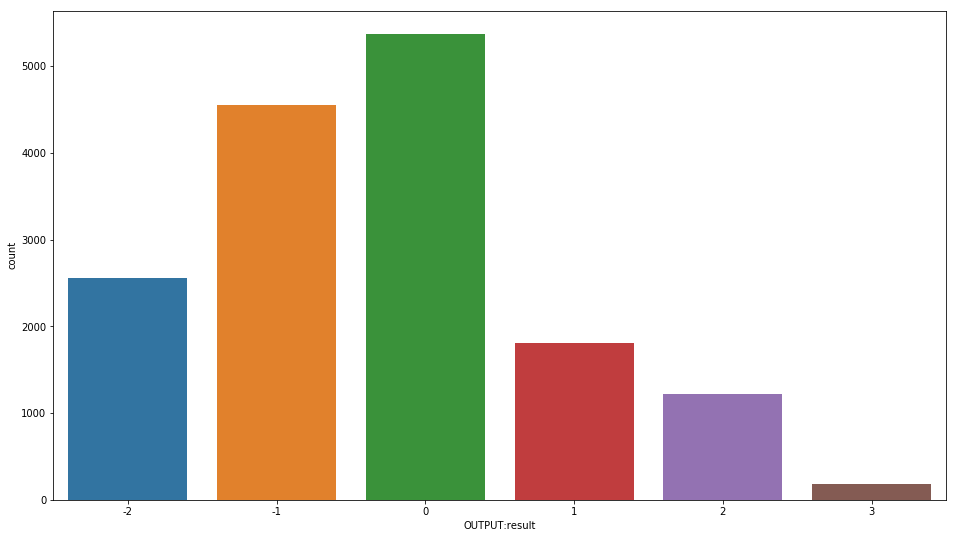

In [30]:
sns.countplot(data['OUTPUT:result'])
#sns.barplot(x = tmp.index, y = 'OUTPUT:result', data = tmp)